In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train.shape

(60000, 28, 28)

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1568, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [5]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1944 - accuracy: 0.9417 - val_loss: 0.0959 - val_accuracy: 0.9693
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0864 - accuracy: 0.9730 - val_loss: 0.0832 - val_accuracy: 0.9752
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0636 - accuracy: 0.9799 - val_loss: 0.0809 - val_accuracy: 0.9756
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0484 - accuracy: 0.9842 - val_loss: 0.0642 - val_accuracy: 0.9808
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0404 - accuracy: 0.9867 - val_loss: 0.0817 - val_accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0342 - accuracy: 0.9889 - val_loss: 0.0623 - val_accuracy: 0.9825
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0302 - accuracy: 0.9907 - val_loss: 0.0813 - val_accuracy:

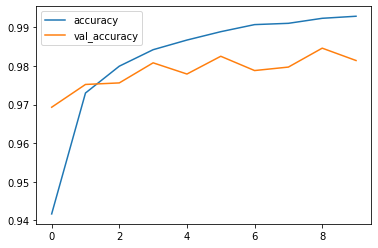

In [7]:
history = model.history.history
plt.plot(history['accuracy'], label='accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
plt.legend()

In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 972us/step - loss: 0.0925 - accuracy: 0.9814


[0.09248074889183044, 0.9814000129699707]

In [9]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [32]:
print('Confusion Matrix:')
print(tf.math.confusion_matrix(predictions, y_test))

Confusion Matrix:
tf.Tensor(
[[ 959    0    0    0    0    1    2    2    1    0]
 [   1 1121    1    0    0    0    3    2    0    2]
 [   5    1 1016    4    1    0    0    8    5    1]
 [   1    0    1  992    1   11    1    0    1    3]
 [   1    0    3    0  961    2    3    1    4    9]
 [   1    0    0    5    0  867    2    0    0    2]
 [   2    3    2    0    6    2  946    0    2    1]
 [   2    0    4    3    2    1    0 1010    2    2]
 [   6   10    5    2    2    5    1    3  957    4]
 [   2    0    0    4    9    3    0    2    2  985]], shape=(10, 10), dtype=int32)


In [11]:
wrong_predictions_indexes = np.where(np.array(predictions == y_test) == False)[0]

index:3558
predicted value: 0, Actual value:5


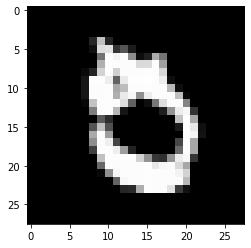

In [29]:
index = np.random.choice(wrong_predictions_indexes)
plt.imshow(x_test[index], cmap = 'gray')
print(f'index:{index}')
print(f'predicted value: {predictions[index]}, Actual value:{y_test[index]}')